In [ ]:
!pip install stargazer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train= df = pd.read_csv('/content/drive/My Drive/train_data.csv')
df_test = pd.read_csv('/content/drive/My Drive/test_data.csv')

print(df_train.shape, df_test.shape)

(13814, 33) (2961, 33)


In [ ]:
season_mapping = {'Winter': 1.0, 'Spring': 0.0}
df_train['season'] = df_train['season'].map(season_mapping)
df_test['season'] = df_test['season'].map(season_mapping)


In [ ]:
df.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'season', 'RH_out_log', 'Appliances_sq',
       'RH_out_sq', 'Appliances_log'],
      dtype='object')

In [ ]:
df['season'].unique()

array([0., 1.])

In [ ]:
df.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'season', 'RH_out_log', 'Appliances_sq',
       'RH_out_sq', 'Appliances_log'],
      dtype='object')

# Baseline Model

In [ ]:
# Baseline Model
y_train = df_train['Appliances_log']
y_test = df_test['Appliances_log']

# Mean baseline
y_train_mean = y_train.mean()
y_pred_train = [y_train_mean] * len(y_train)
y_pred_test = [y_train_mean] * len(y_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.4185174150493211
Test MSE: 0.4538367510539444


#Linear Reg

In [ ]:
 predictors = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'season']
X1_train = df_train[predictors]
X1_test = df_test[predictors]
y_train = df_train['Appliances_log']
y_test = df_test['Appliances_log']

In [ ]:
from sklearn.linear_model import LinearRegression # 1. choose model class
model = LinearRegression(fit_intercept=True)      # 2. instantiate model
model.fit(X1_train, y_train)                      # 3. fit model to data

model.coef_, model.intercept_

(array([ 1.62456877e-02,  1.56272250e-02,  1.09252071e-01, -9.71439017e-02,
        -8.53755785e-02,  1.53180348e-01,  2.63797836e-02, -2.24993021e-02,
        -1.81828071e-03,  4.23208661e-03,  2.99855286e-03,  5.22368271e-02,
         3.28600015e-03, -2.15794917e-02, -5.04881488e-03,  9.85009942e-02,
        -4.43950795e-02, -1.11704284e-01, -1.28093794e-02, -7.79275417e-02,
         9.01817555e-05, -9.69780593e-03,  1.43880847e-02,  9.39427843e-04,
         4.23599063e-02,  1.24271960e-04,  1.24271960e-04, -5.96097039e-02]),
 4.321613139478645)

#Train MSE, RMSE and plot

In [ ]:
y_train_fit = model.predict(X1_train)              #  predict on training data

mse_train = np.mean( (y_train - y_train_fit)**2 )
print(np.sqrt(mse_train), mse_train)

#values are small because of log, the values are super small (est -5 to 5)


0.5523500098282967 0.30509053335731956


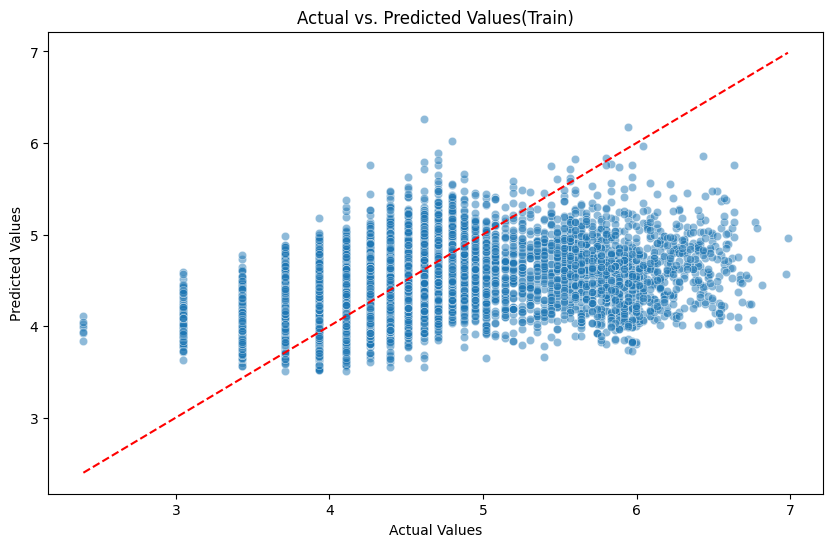

In [ ]:
#plot MSE train using sns
import seaborn as sns
import matplotlib.pyplot as plt

# Data for plotting
train_data = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_fit})

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Actual', y='Predicted', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values(Train)')
plt.show()


#Test MSE, RMSE and plot

In [ ]:
y_test_fit = model.predict(X1_test)                # 4 predict on test data
mse_test = np.mean( (y_test - y_test_fit)**2 )
print(np.sqrt(mse_test), mse_test)




0.5745557702715014 0.33011433315227834


In [ ]:
r2_train = r2_score(y_train, y_train_fit)
r2_test = r2_score(y_test, y_test_fit)
print(r2_train, r2_test)


0.27102069737918677 0.271872936199804


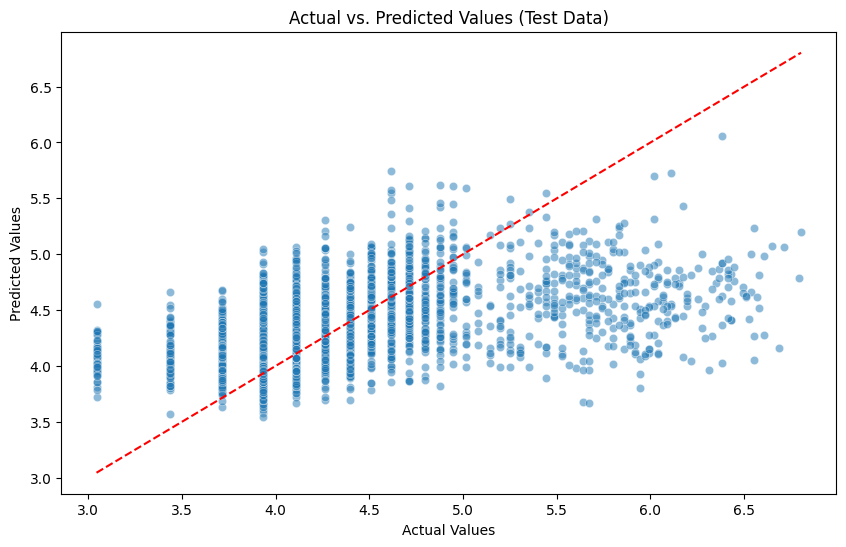

In [ ]:
# Predict on test data
y_test_fit = model.predict(X1_test)

# Data for plotting
test_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_fit})

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_data, x='Actual', y='Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Data)')
plt.show()


In [ ]:
import statsmodels.formula.api as smf

smf_model = smf.ols(formula='Appliances_log ~ lights + T1 + RH_1 + T2 + RH_2 + T3 + RH_3 + T4 + RH_4 + T5 + RH_5 + T6 + RH_6 + T7 + RH_7 + T_out + Press_mm_hg + RH_out + Windspeed + Visibility + Tdewpoint + rv1 + rv2 + season', data=df_train)
results = smf_model.fit()
print(results.summary())

In [ ]:
import statsmodels.api as smf
from stargazer.stargazer import Stargazer

Stargazer([results])

In [ ]:
#Stargazer([smf_model])

#Residuals

In [ ]:
# Calculate residuals for training data
train_residuals = y_train - y_train_fit

# Calculate residuals for test data
test_residuals = y_test - y_test_fit

# Display the first few residuals for each set
print("Training Residuals:\n", train_residuals.head())
print("\nTest Residuals:\n", test_residuals.head())
